In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Punto 1

In [4]:
#Descarga de datos
activos = ["MCD", "GE","IBM","T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
precios_adj = precios.loc[:,"Adj Close"]
precios_adj

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124489,76.034500,43.710953,7.295421
2010-02-01,91.011131,78.997841,44.705177,7.279534
2010-03-01,103.782242,80.031357,47.111691,7.581747
2010-04-01,107.545769,80.499374,49.844315,7.646302
2010-05-01,93.232948,78.165497,47.217613,7.283844
...,...,...,...,...
2021-08-01,105.016113,126.196457,232.276596,19.121510
2021-09-01,102.645004,126.366852,237.139908,18.835594
2021-10-01,104.559380,113.787468,241.506790,17.615221


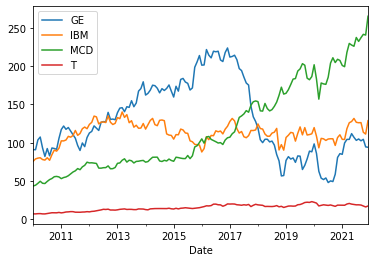

In [ ]:
precios_adj.plot();

In [ ]:
retornos = precios_adj.pct_change().dropna()
retornos.head()

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001244,0.038974,0.022745,-0.002178
2010-03-01,0.140324,0.013082,0.053831,0.041516
2010-04-01,0.036264,0.005848,0.058004,0.008514
2010-05-01,-0.133086,-0.028992,-0.052699,-0.047403
2010-06-01,-0.118042,-0.009157,-0.006678,-0.004526


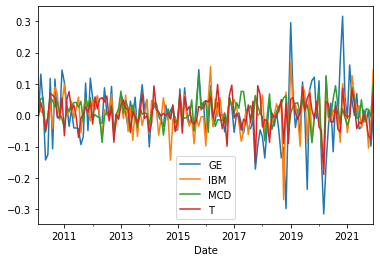

In [6]:
#Punto 1a: Calculo de retornos logarítmicos
ret=np.log(precios_adj/precios_adj.shift()).dropna()
ret.plot();

In [ ]:
#Punto 1b: Descripción de variables
ret.describe()

,GE,IBM,MCD,T
count,143.000000,143.000000,143.000000,143.000000
mean,0.000231,0.003689,0.012605,0.006158
std,0.086937,0.060536,0.042488,0.048299
min,-0.315013,-0.270005,-0.154431,-0.189159
25%,-0.041398,-0.024861,-0.009248,-0.019500
50%,-0.001929,0.002619,0.011742,0.006484
75%,0.042081,0.043382,0.040007,0.042621
max,0.316246,0.167670,0.130367,0.098672


In [ ]:
#Punto 1b: Descripción de variables
stats= {"Media":ret.mean(), "Mediana":ret.median(), "Desviación":ret.std(), 
        "Curtosis": ret.kurt(), "Simetría": ret.skew()}
Descripción = pd.DataFrame(stats)
Descripción

,Media,Mediana,Desviación,Curtosis,Simetría
GE,0.000231,-0.001929,0.086937,3.040763,-0.088297
IBM,0.003689,0.002619,0.060536,2.653591,-0.564633
MCD,0.012605,0.011742,0.042488,1.596974,-0.410192
T,0.006158,0.006484,0.048299,1.549802,-0.707907


Por la anterior información podemos ver cómo, para 3 de los 4 activos la curtosis es inferior a 3, lo que quiere decir que su distribución tiene una forma platicúrtica, es decir, los valores de estos activos tienen una baja concentración en torno a su media.
Para el activo GE, dada su curtosis, se ve una distribución aproximada a la mesocúrtica, es decir, existe una concentración normal en torno a su media.


In [ ]:
#Punto 1c: Retornos esperados y volatilidades para los activos
mean,sigma=ret['GE'].mean(),ret["GE"].std()
mean,sigma
datosGE = mean*12,sigma*np.sqrt(12)
datosGE

(0.0027767124593385075, 0.3011571896842215)

In [ ]:
mean,sigma=ret['IBM'].mean(),ret["IBM"].std()
mean,sigma
datosIBM = mean*12,sigma*np.sqrt(12)
datosIBM

(0.04427082296124397, 0.20970330986802557)

In [ ]:
mean,sigma=ret['MCD'].mean(),ret["MCD"].std()
mean,sigma
datosMCD = mean*12,sigma*np.sqrt(12)
datosMCD

(0.1512650197971706, 0.147183510494918)

In [ ]:
mean,sigma=ret['T'].mean(),ret["T"].std()
mean,sigma
datosT = mean*12,sigma*np.sqrt(12)
datosT

(0.07389430221119705, 0.16731138772299328)

In [ ]:
datosdf = {"GE":datosGE, "IBM":datosIBM, "MCD":datosMCD,"T":datosT}
df = pd.DataFrame(datosdf, index = ["R esperado", "Volatilidad"])
df

,GE,IBM,MCD,T
R esperado,0.002777,0.044271,0.151265,0.073894
Volatilidad,0.301157,0.209703,0.147184,0.167311


De este punto se puede destacar que el activo con retornos más volatiles es General Electric ("GE"). Si se observa la gráfica para los retornos continuos se observa que, efectivamente, GE tiene los puntos más altos y bajos, principalmente entre 2018 y 2021. Sin embargo, no es quien tiene un mayor retorno esperado, ya que este corresponde a McDonalds ("MCD"), que tiene además la volatilidad más baja.

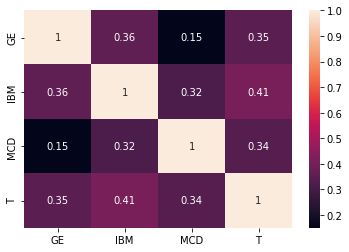

In [ ]:
#Punto 1d: Matriz de correlación de pearson
matriz_correlacion=ret.corr().round(2)
sns.heatmap(data=matriz_correlacion,annot=True,annot_kws={"size": 10});

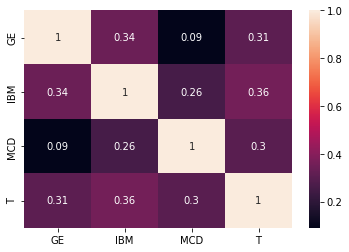

In [ ]:
#Punto 1d: matriz de correlación de spearman
matriz_correlacion=ret.corr(method = "spearman").round(2)
sns.heatmap(data=matriz_correlacion,annot=True,annot_kws={"size": 10});

Para ambos coeficientes, en la matriz, no se observan correlaciones negativas, es decir, ningun activo tiene una relación inversa con otra. Sin embargo, se observa que la relación para todos los activos, con la excepción de 1 casos, es baja. Dicha excepción es IBM con AT&T, cuya relación es moderada, la primera se desempeña en el sector tecnológico, mientras que el segundo en el de telecomunicaciones, por lo que, a pesar de no tener una correlación fuerte, se entiende por qué pude tener una mayor correlación con respecto al resto de activos.
Por otro lado, quienes tienen la correlación más baja son GE y MCD. Curiosamente el activo con mayor volatilidad y menor retorno esperado, y el activo con menor volatilidad y mayor retorno esperado respectivamente.

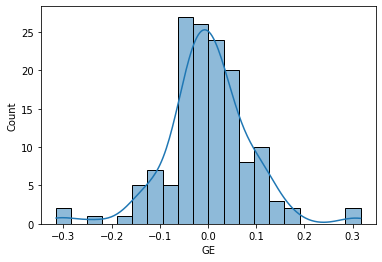

In [8]:
#e Histograma para GE
sns.color_palette("rocket", as_cmap=True)
sns.histplot(data=ret, x="GE", kde=True);

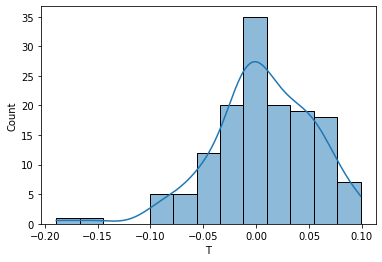

In [9]:
#e Histograma para MCD
sns.histplot(data=ret, x="T", kde=True);

Se eligieron estos activos debido a los coeficientes de curtosis de ambos, el más alto y más bajo respectivamente, y se observa como, en efecto, General Electric tiene una forma más parecida a una distribución normal que en el caso de AT&T.
Para confirmar estas supociciones, se realiza una prueba Kolmogorov-Smirnov

In [ ]:
#f Prueba de Kolmogorov-Smirnov
GE = stats.kstest(ret["GE"],'norm')
IBM = stats.kstest(ret["IBM"],'norm')
MCD = stats.kstest(ret["MCD"],'norm')
T = stats.kstest(ret["T"],'norm')

stats2={"GE":GE, "IBM":IBM, "MCD":MCD,"T":T}
df2=pd.DataFrame(stats2, index=["Statistic", "p-value"])
df2

,GE,IBM,MCD,T
Statistic,4.159826e-01,4.372657e-01,4.543298e-01,4.606994e-01
p-value,6.374863e-23,2.144168e-25,1.736400e-27,2.713516e-28


Punto 2

In [ ]:
#i) Volatilidad con desviación estándar
sigma_m = ret.std()
mean_m=ret.mean()
sigma_m

GE     0.086937
IBM    0.060536
MCD    0.042488
T      0.048299
dtype: float64

In [ ]:
#i) Volatilidad con desviación estándar anualizada
sigma_m = ret.std()
mean_m=ret.mean()
sigma=sigma_m*np.sqrt(12)
sigma

GE     0.301157
IBM    0.209703
MCD    0.147184
T      0.167311
dtype: float64

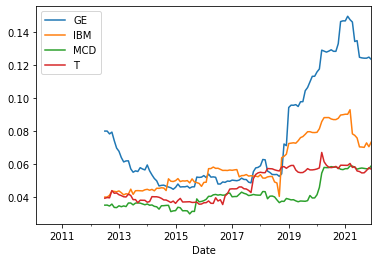

In [ ]:
roll_std = (ret.rolling(window=30).std())
roll_std.plot();

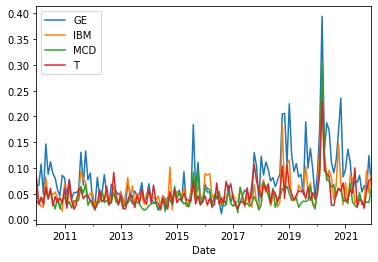

In [ ]:
# ii) Volatilidad con parkinson
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_m = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_m
sigmaPark_m.plot();

In [ ]:
# Volatilidad con parkinson anualizada
from numpy.ma.core import sqrt
sigmaPark=sigmaPark_m.mean()*np.sqrt(12)
sigmaPark

GE     0.267589
IBM    0.187842
MCD    0.147625
T      0.167825
dtype: float64

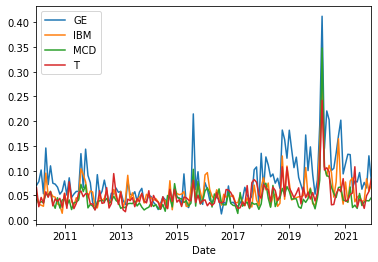

In [ ]:
#iii) Volatilidad de Garman-Klass
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_m = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_m.plot();

In [ ]:
#Volatilidad anualizada de Garman-Klass
sigmaGK=sigmaGK_m.mean()*np.sqrt(12)
sigmaGK

GE     0.274446
IBM    0.191380
MCD    0.152538
T      0.172823
dtype: float64

In [ ]:
#iv) Volatilidad ponderada exponencial
# Definir la función
def EWMAvol(ret,Lambda):
  m = len(ret["GE"]) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(Lambda,m)

  varewma = ((np.power(ret["GE"],2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol)

In [ ]:
#Sigmaewma anualizada para los activos
Lambda = 0.94
sigmaewmaGE = EWMAvol(ret["GE"],0.94)*np.sqrt(12)
sigmaewmaGE

0.36506067326550556

In [ ]:
sigmaewmaIBM = EWMAvol(ret["IBM"],Lambda)*np.sqrt(12)
sigmaewmaIBM

0.2563707936738064

In [ ]:
sigmaewmaMCD = EWMAvol(ret["MCD"],Lambda)*np.sqrt(12)
sigmaewmaMCD

0.1818067759960261

In [ ]:
sigmaewmaT = EWMAvol(ret["T"],Lambda)*np.sqrt(12)
sigmaewmaT

0.18827761903793963

In [ ]:
results = [sigmaewmaGE, sigmaewmaIBM, sigmaewmaMCD, sigmaewmaT]
ewmastats={"EWMA":results}
ewma=pd.DataFrame(ewmastats, index=["GE","IBM", "MCD", "T"])
ewma

,EWMA
GE,0.365061
IBM,0.256371
MCD,0.181807
T,0.188278


In [ ]:
#Resultados de volatilidades anualizadas para todos los activos
stats3={"std":sigma, "Parkinson":sigmaPark, "Garman-Klass":sigmaGK}
df3=pd.DataFrame(stats3, index=["GE","IBM", "MCD", "T"])
Vol = pd.concat([df3, ewma], axis=1)
Vol

,std,Parkinson,Garman-Klass,EWMA
GE,0.301157,0.267589,0.274446,0.365061
IBM,0.209703,0.187842,0.191380,0.256371
MCD,0.147184,0.147625,0.152538,0.181807
T,0.167311,0.167825,0.172823,0.188278


Con las diferentes medidas de volatilidad, se observa que, para todos los caso, General Electric es el activo con la mayor volatilidad.
Como en los calculos anteriores, observamos que McDonalds presenta las menores volatilidades, y AT&T también tiene volatilidades bajas.

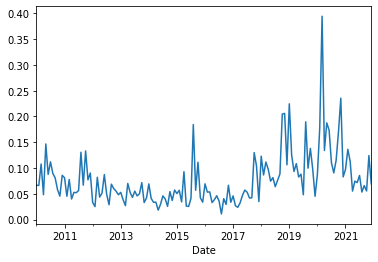

In [ ]:
#2b. Gráfica de volatilidad de parkinson para GE
sigmaPark_m["GE"].plot();

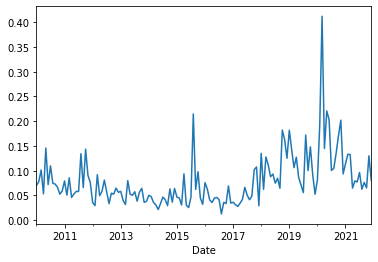

In [ ]:
#2b. Gráfica de volatilidad de Garman-Klass para GE
sigmaGK_m["GE"].plot();

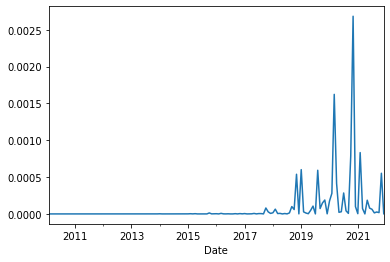

In [ ]:
#2b. Gráfica de EWMA  Para GE
varewma = ((np.power(ret["GE"],2)*(np.power(np.repeat(Lambda,len(ret["GE"])),np.arange(len(ret["GE"])-1,-1,-1)))))*(1-0.94)
varewma.plot();

Se eligió General Electric debido a que es el activo que presenta las mayores volatilidades. Gracias a la última nos damos cuenta que GE empezó a tener volatiloidades más altas desde, aproximadamente, finales de 2018.
En este año, GE tuvo pérdidas equivalentes a más del doble con respecto al año anterior, 22,802 millones para ser más exactos. Por otro lado, empezó una reestructuración de su negocio, por lo que no es de extrañar las altas volatilidades que presenta. Para este periodo, tuvo unas pérdidas por acción de 2,62 dólares y, por si fuera poco, llegó a un acuerdo con la justicia estadounidense, que investigaba una posible violación asociada al extinto negocio de hipotécas de GE.

Por otro lado, John Flannery, el antiguo máximo directivo de GE, que había estado en el cargo por 16 años, dimitió a mitad de 2018 y fue sustituido por H. Lawrence Culp Jr. Con este cambio en la gerencia también se puede explicar las altas volatilidades de la compañía.

-

- La vanguardia (2019). General Electric perdió 22.802 millones en 2018, frente a los 8.929 de 2017. *La Vanguardia*